## Breast Cancer binary classification

### 1. Import scikit modules

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import matplotlib.pyplot as plt


###2. load data and preprocessing

In [5]:
 breast_cancer = load_breast_cancer()
 print(breast_cancer.keys())
 breast_cancer.target_names


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


array(['malignant', 'benign'], dtype='<U9')

In [7]:
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target
print(breast_cancer_data.shape,breast_cancer_label.shape)

(569, 30) (569,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data,
                                                    breast_cancer_label,       
                                                    test_size = 0.2,
                                                    random_state = 20)
X_test.shape

(114, 30)

###3. Modelling & Fitting

1)SVM

In [10]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred1 = svm_model.predict(X_test)

report1 = classification_report(y_test,y_pred1, output_dict=True) #output을 dictionary로 반환


print(report1['macro avg']['precision'])
print(report1['macro avg']['recall'])
print(report1['accuracy'])

0.9459459459459459
0.9166666666666667
0.9298245614035088


2)SGD Classifier

In [11]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred2 = sgd_model.predict(X_test)

report2 = classification_report(y_test,y_pred2, output_dict=True) #output을 dictionary로 반환


print(report2['macro avg']['precision'])
print(report2['macro avg']['recall'])
print(report2['accuracy'])

0.9024390243902439
0.8333333333333333
0.8596491228070176


3) Logistic regression

In [12]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred3 = logistic_model.predict(X_test)

report3 = classification_report(y_test,y_pred3, output_dict=True) #output을 dictionary로 반환


print(report3['macro avg']['precision'])
print(report3['macro avg']['recall'])
print(report3['accuracy'])

0.9306265984654731
0.925189393939394
0.9298245614035088


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


4) Decision tree

In [13]:
decision_tree = DecisionTreeClassifier(random_state=30)
decision_tree.fit(X_train, y_train)
y_pred4 = decision_tree.predict(X_test)

report4 = classification_report(y_test,y_pred4, output_dict=True) #output을 dictionary로 반환


print(report4['macro avg']['precision'])
print(report4['macro avg']['recall'])
print(report4['accuracy'])

0.948849104859335
0.9431818181818181
0.9473684210526315


5) Random Forest(ensemble of decision tree)

In [14]:
random_forest = RandomForestClassifier(random_state=28)
random_forest.fit(X_train, y_train)
y_pred5 = random_forest.predict(X_test)

report5 = classification_report(y_test,y_pred5, output_dict=True) #output을 dictionary로 반환


print(report5['macro avg']['precision'])
print(report5['macro avg']['recall'])
print(report5['accuracy'])

0.9925373134328358
0.9895833333333333
0.9912280701754386


### 4. Evaluating each Model and analysing metrics

In [15]:
print(report1['macro avg']['precision'])
print(report1['macro avg']['recall'])
print(report1['accuracy'])
precision_list = []
recall_list = []
accuracy_list = []


precision_list.extend([report1['macro avg']['precision'],
                      report2['macro avg']['precision'],
                       report3['macro avg']['precision'],
                       report4['macro avg']['precision'],
                       report5['macro avg']['precision']
                      ])
recall_list.extend([report1['macro avg']['recall'],
                      report2['macro avg']['recall'],
                       report3['macro avg']['recall'],
                       report4['macro avg']['recall'],
                       report5['macro avg']['recall']
                      ])
accuracy_list.extend([report1['accuracy'],
                      report2['accuracy'],
                       report3['accuracy'],
                       report4['accuracy'],
                       report5['accuracy']])

print(precision_list)
models_list = ['SVM', 'SGD', 'LOGI', 'DTree', 'RanFor']


0.9459459459459459
0.9166666666666667
0.9298245614035088
[0.9459459459459459, 0.9024390243902439, 0.9306265984654731, 0.948849104859335, 0.9925373134328358]


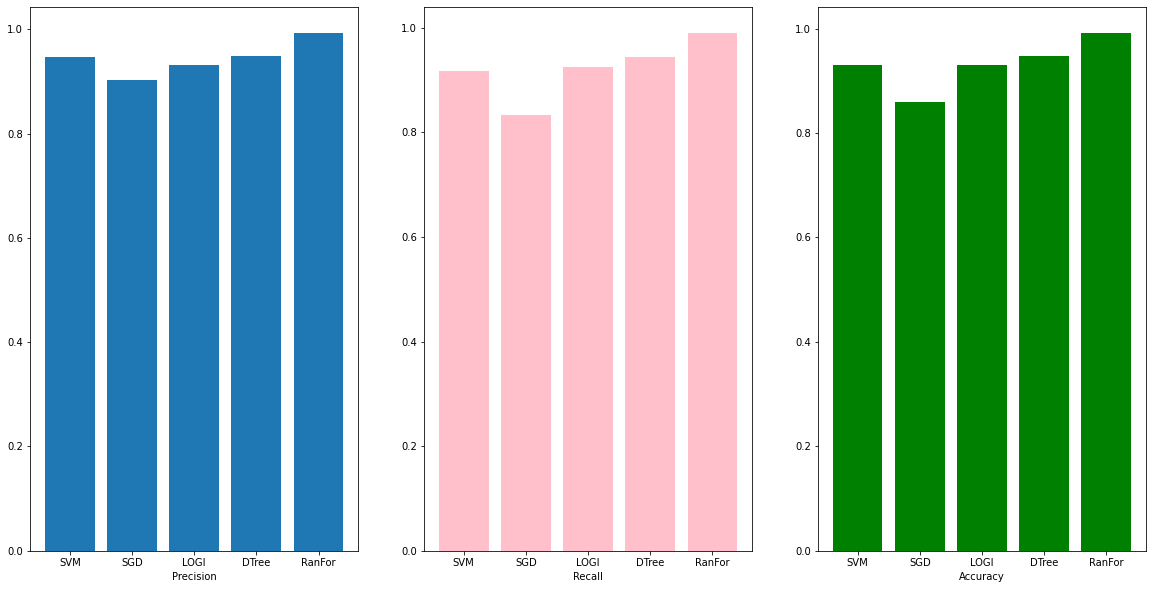

In precision, RanFor is the best of the five by 0.9925373134328358
In recall, RanFor is the best of the five by 0.9895833333333333
In accuracy, RanFor is the best of the five by 0.9912280701754386


In [16]:

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.bar(models_list,precision_list)
plt.xlabel('Precision')
plt.subplot(132)
plt.bar(models_list,recall_list, color = 'pink')
plt.xlabel('Recall')
plt.subplot(133)
plt.bar(models_list,accuracy_list, color = 'green')
plt.xlabel('Accuracy')
plt.show()

print(f'In precision, {models_list[np.argmax(precision_list)]} is the best of the five by {max(precision_list)}')
print(f'In recall, {models_list[np.argmax(recall_list)]} is the best of the five by {max(recall_list)}')
print(f'In accuracy, {models_list[np.argmax(accuracy_list)]} is the best of the five by {max(accuracy_list)}')


## What is the best model and why is it the best?

## -> **Random Forest** is the best model because it has the highest value of the three major metrics

## why did i  choose these metrics?
## -> it is the basic metrics in classification

*Retrospect*

additional, qulitative and quantitative analysis of the data is needed